##import library


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# model building tools
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

##Data preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/kaushi/Sinhala_mithuru/Function1/dataset/sentences/Grade 1 & 2 - sinhala Sentences dataset (Sentences with 2 and 3 Words in oral Sinhala Language).csv")
df.head(10)

,Sentences,class
0,මෙහෙ එන්න,correct
1,එහෙ යන්න,correct
2,මෙහෙ බලන්න,correct
3,බත් කන්න,correct
4,වතුර බොන්න,correct
5,මට දෙන්න,correct
6,මේක ගන්න,correct
7,ඒක නවත්තන්න,correct
8,දොර අරින්න,correct
9,ජනෙල් වහන්න,correct


In [ ]:
df.isnull().sum()
df.isna()
df.dropna(axis=0,inplace=True)
df.head()

,Sentences,class
0,මෙහෙ එන්න,correct
1,එහෙ යන්න,correct
2,මෙහෙ බලන්න,correct
3,බත් කන්න,correct
4,වතුර බොන්න,correct


In [ ]:
df["class"].value_counts()

,count
class,
correct,414
incorrect,414


In [ ]:
# function to clean text
def clean_txt(text):
    text=str(text)
    text=text.lower()
    #text=re.sub(r'[^\w\s]',' ',text)
    #text=re.sub(r'[_0-9]',' ',text)
    #text=re.sub(r'\s\s+',' ',text)
    return text



In [ ]:
x= [clean_txt(text) for text in df["Sentences"]]

In [ ]:
print(x)

['මෙහෙ එන්න', 'එහෙ යන්න', 'මෙහෙ බලන්න', 'බත් කන්න', 'වතුර බොන්න', 'මට දෙන්න', 'මේක ගන්න', 'ඒක නවත්තන්න', 'දොර අරින්න', 'ජනෙල් වහන්න', 'දැන් නිදාගන්න', 'දත් මදින්න', 'පොත කියවන්න', 'අකුරු ලියන්න', 'අත් හෝදන්න', 'මෙතන තියන්න', 'දුවන්න ඉක්මනින්', 'යන්න හෙමින්', 'සමාවෙන්න කියන්න', 'කතාවක් කියන්න', 'රූපයක් අඳින්න', 'මට බඩගිනියි', 'මට පිපාසයි', 'මට මහන්සියි', 'මට සතුටුයි', 'මට දුකයි', 'ඒක මට ඕන', 'මට උදව් ඕන', 'මට රිදෙනවා', 'හරි සීතලයි', 'හරි රස්නෙයි', 'මම යනවා', 'මම මෙහෙ', 'ටිකක් ඉන්න', 'මට පුළුවන්', 'මට බෑ', 'මේ මොකක්ද?', 'එයා කොහෙද?', 'ඒ කවුද?', 'ඒක ඇයි?', 'යන්නේ කොහොමද?', 'ආවේ කවදාද?', 'ඒක මොකක්ද?', 'හරි හොඳයි', 'හරි දක්ෂයි', 'හරි ලස්සනයි', 'හරි ලොකුයි', 'හරි පොඩියි', 'මොකක්ද මේ?', 'ඒක වැරදියි', 'ඒක හරි', 'අඬන්න එපා', 'ගහන්න එපා', 'ආයෙත් කරන්න', 'ඒක අලුත්', 'ඒක පරණ', 'මෙහෙට එන්න', 'එහෙට යන්න', 'එළියට යන්න', 'ඇතුළට එන්න', 'පස්සට යන්න', 'ලඟට එන්න', 'හෙමින් යන්න', 'ඉක්මන්ට දුවන්න', 'උඩට නගින්න', 'යටට යන්න', 'වටේ කැරකෙන්න', 'උඩ බලන්න', 'යට බලන්න', 'මෙතන නවතින්න', 'දැන් එන්න', 'ඒක දෙන්න', 'මග

In [1]:
# using Tfidf Vectorizer:
tfidf = TfidfVectorizer()
tfidf.fit(x)
x_ready = tfidf.transform(x)

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
print(x_ready)
print(x_ready.shape)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1709 stored elements and shape (828, 257)>
  Coords	Values
  (0, 50)	1.0
  (1, 56)	0.8415015872430389
  (1, 188)	0.540254642430258
  (2, 165)	1.0
  (3, 69)	0.6143215351983234
  (3, 159)	0.7890557973879764
  (4, 215)	1.0
  (5, 170)	1.0
  (6, 88)	1.0
  (7, 58)	0.44332008055230043
  (7, 111)	0.5969687469035255
  (7, 142)	0.668652092944856
  (8, 12)	1.0
  (9, 99)	0.7268340744077298
  (9, 221)	0.6868130955943245
  (10, 88)	1.0
  (11, 121)	0.7418864467510616
  (11, 172)	0.6705255402496494
  (12, 194)	1.0
  (13, 0)	0.8322222818721111
  (13, 188)	0.5544421282294271
  (14, 3)	0.735298758238213
  (14, 122)	0.6777431195765413
  (15, 111)	0.8239237055531778
  (15, 188)	0.5667007388626913
  :	:
  (818, 216)	0.41101223468474707
  (818, 227)	0.5176562548845336
  (818, 248)	0.3396225901330972
  (819, 7)	0.4783893007452339
  (819, 89)	0.634600539718863
  (819, 147)	0.6069809156151565
  (820, 58)	0.4214883917852848
  (820, 102)	0.608055221727

In [ ]:
enc = LabelEncoder()
enc.fit( df["class"])
y_ready = enc.transform(df["class"])


In [ ]:
print(y_ready)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# storing encoded label hast list as 'labels'
labels = enc.classes_
# display first 10 labels:
print(labels[:])
print(len(labels))

['correct' 'incorrect']
2


##Training model

In [ ]:
# train test split:
x_train, x_test, y_train, y_test = train_test_split(x_ready,y_ready,
                                                    test_size=0.1, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((745, 257), (745,), (83, 257), (83,))

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb_score = nb.score(x_test,y_test)
print(nb_score)

0.13253012048192772


In [ ]:
# use pipeline to combine prefitted vectorizer and trained model into one object
model = Pipeline([('vectorizer',tfidf),('nb',nb)])

In [ ]:
# save the model:
pickle.dump(model,open('sentence_1_2_model_v1.pkl','wb'))
# save the encoder
pickle.dump(enc,open('sentence_1_2_encode.pkl','wb'))

##Model evaluation

In [ ]:
predict_Y=nb.predict(x_test)
print(predict_Y)

[0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 0 0 0]


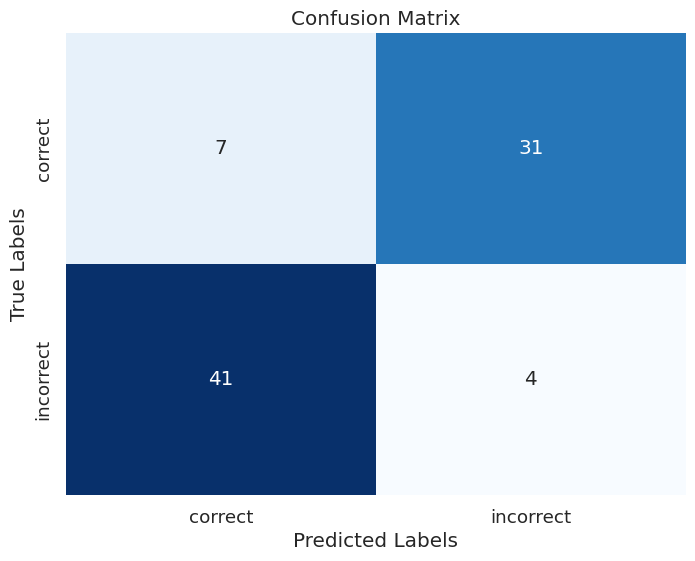

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test,predict_Y)

# Define class labels if available
class_labels = ['correct' ,'incorrect']  # Replace with your class labels if available

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and predict_Y contains the predicted labels
report = classification_report(y_test,predict_Y)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.18      0.16        38
           1       0.11      0.09      0.10        45

    accuracy                           0.13        83
   macro avg       0.13      0.14      0.13        83
weighted avg       0.13      0.13      0.13        83

